In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV



In [5]:
data = pd.read_csv("/content/Student_Performance.csv")

In [6]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


In [7]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


In [9]:
new_data = pd.get_dummies(data, drop_first=True)

In [10]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,NaN,1,91,True
1,4,82,4.0,2,65,False
2,8,51,7.0,2,45,True
3,5,52,5.0,2,36,True
4,7,75,NaN,5,66,False


In [11]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,2
Sample Question Papers Practiced,0
Performance Index,0


In [12]:
new_data.fillna(new_data.mean(), inplace=True)

In [13]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,6.530206,1,91,True
1,4,82,4.000000,2,65,False
2,8,51,7.000000,2,45,True
3,5,52,5.000000,2,36,True
4,7,75,6.530206,5,66,False


In [14]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  127


In [15]:
new_data.drop_duplicates(inplace=True)

In [16]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  0


In [17]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]

In [18]:
independent = new_data.drop("Score", axis=1)
dependent = new_data.iloc[:, 4]

In [19]:
independent.head()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Extracurricular Activities
0,7,99,6.530206,1,True
1,4,82,4.000000,2,False
2,8,51,7.000000,2,True
3,5,52,5.000000,2,True
4,7,75,6.530206,5,False


In [20]:
dependent.head()

,Score
0,91
1,65
2,45
3,36
4,66


In [21]:
new_data.describe()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Score
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531253,4.583004,55.216651
std,2.589081,17.325601,1.697437,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


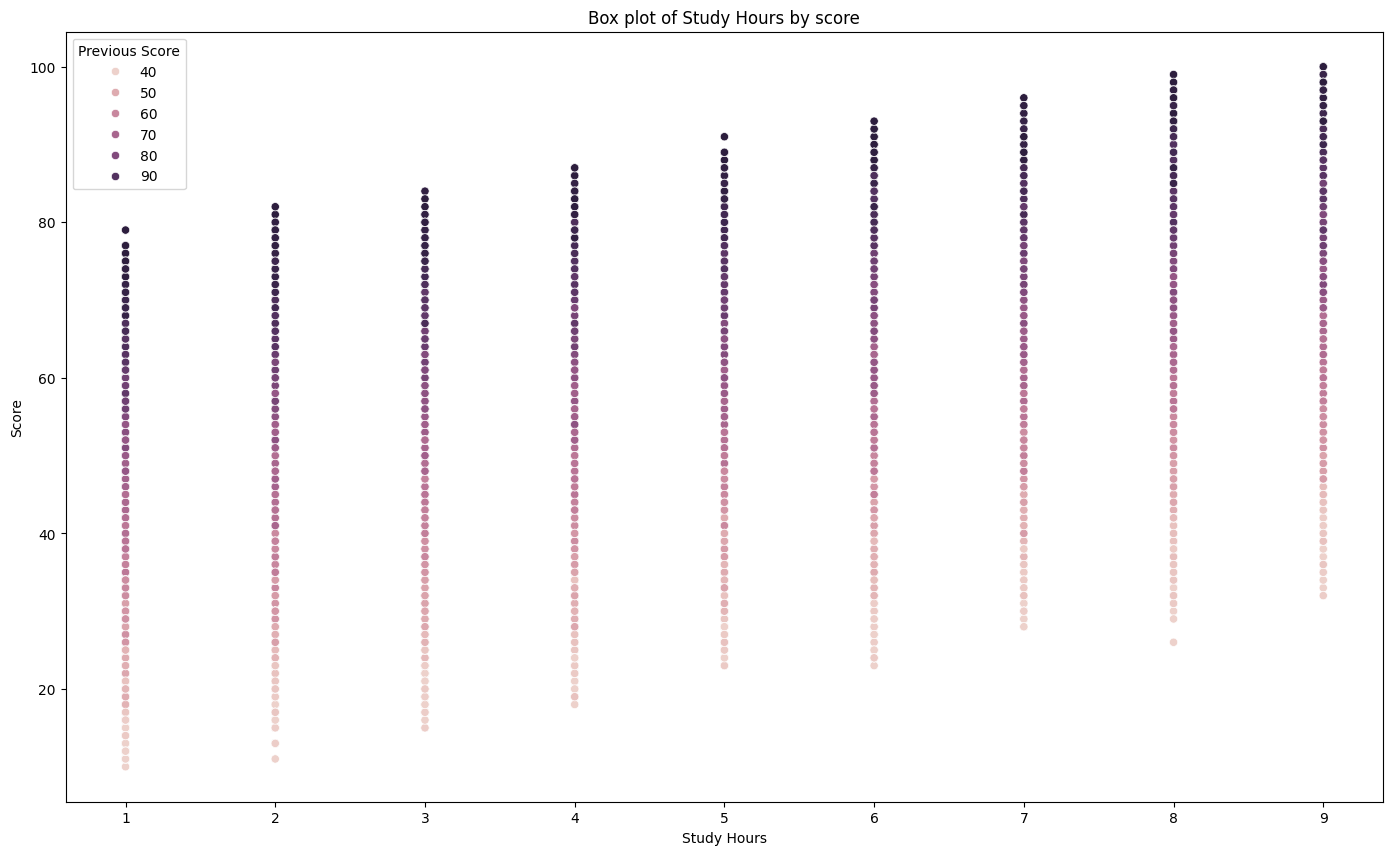

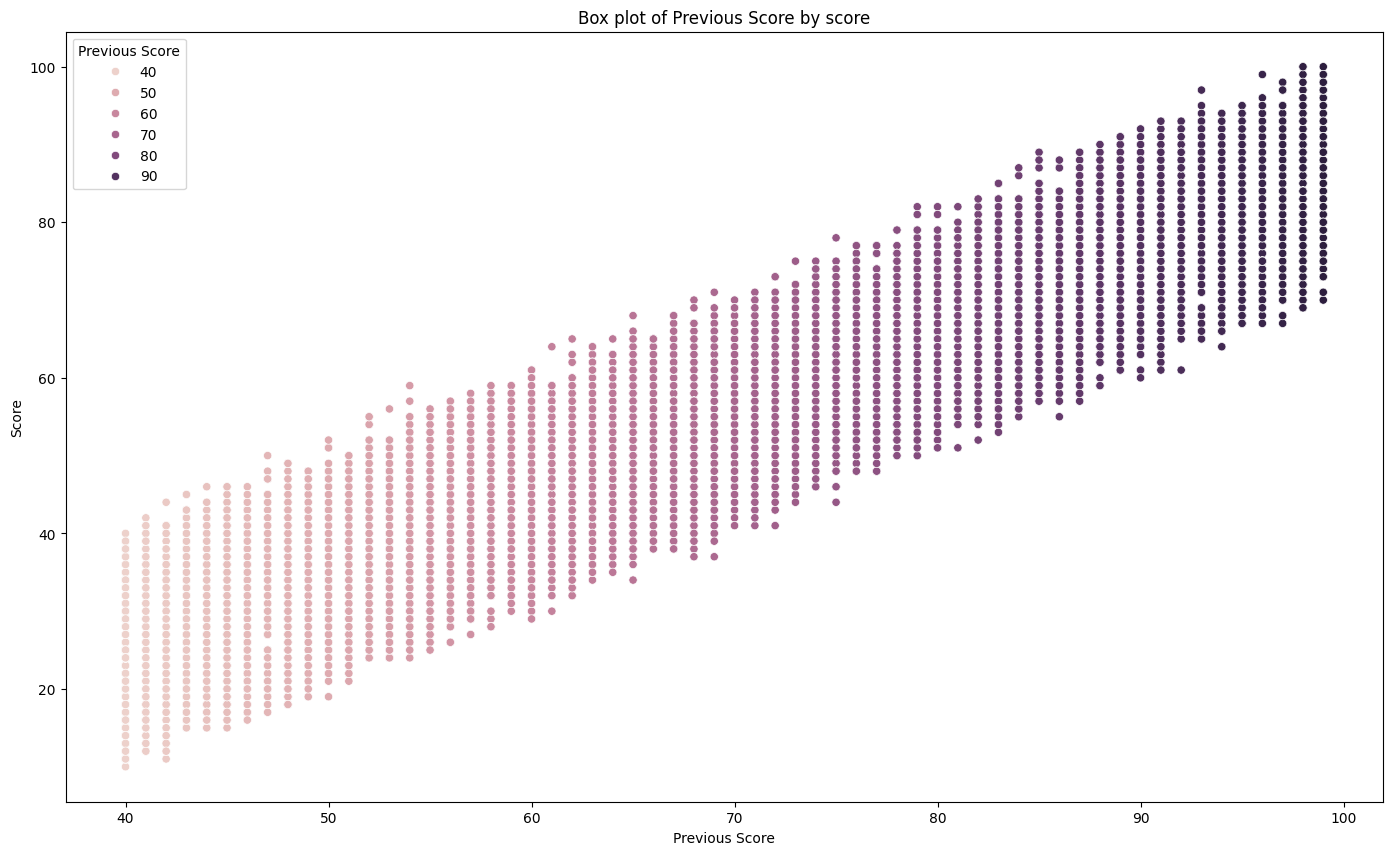

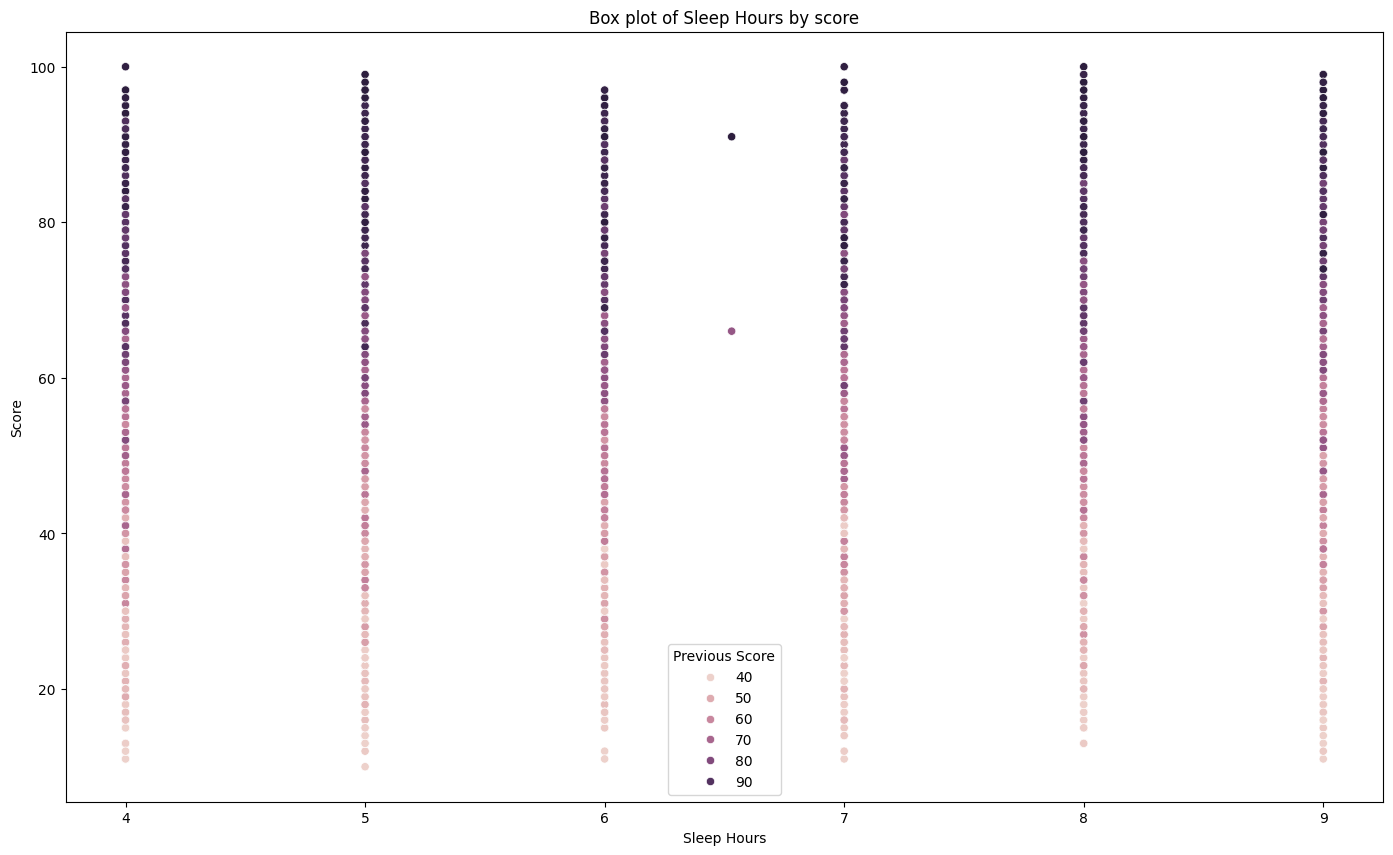

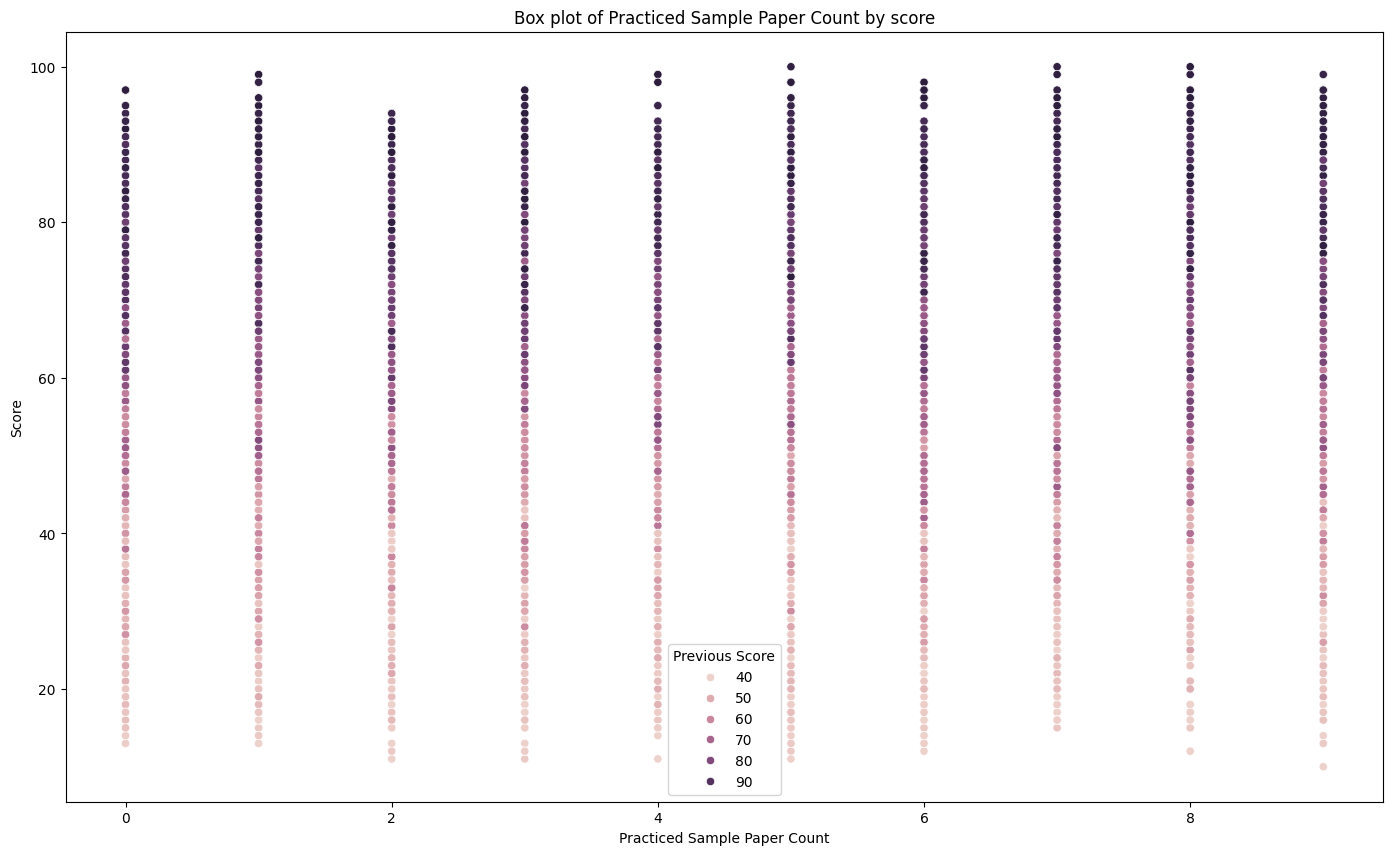

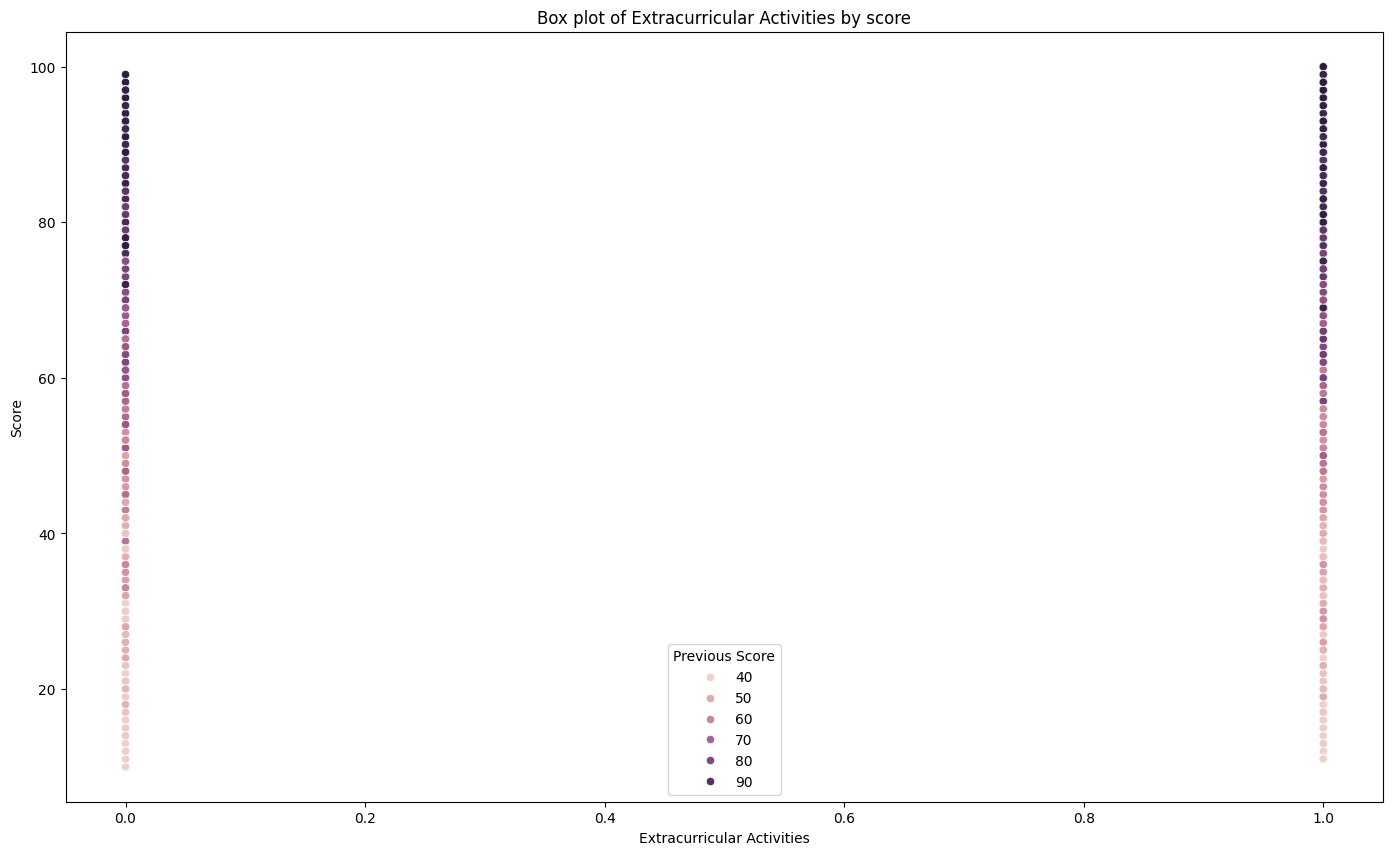

In [22]:
for columns in independent.columns:
    plt.figure(figsize=(17,10))
    sns.scatterplot(x = columns, y = dependent, data = new_data, hue = "Previous Score")
    plt.title(f'Box plot of {columns} by score')
    plt.xlabel(columns)
    plt.ylabel("Score")
    plt.show()

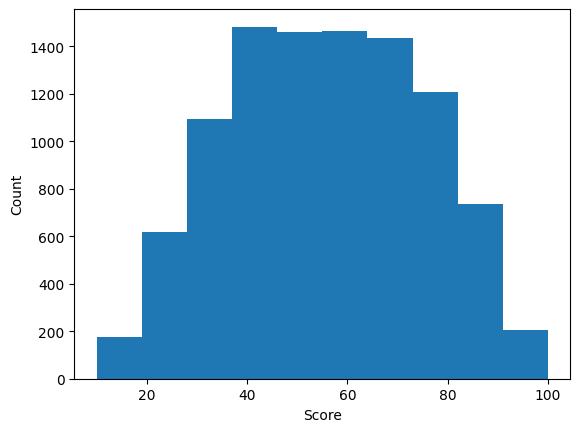

In [23]:
plt.hist(dependent, bins=10)
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

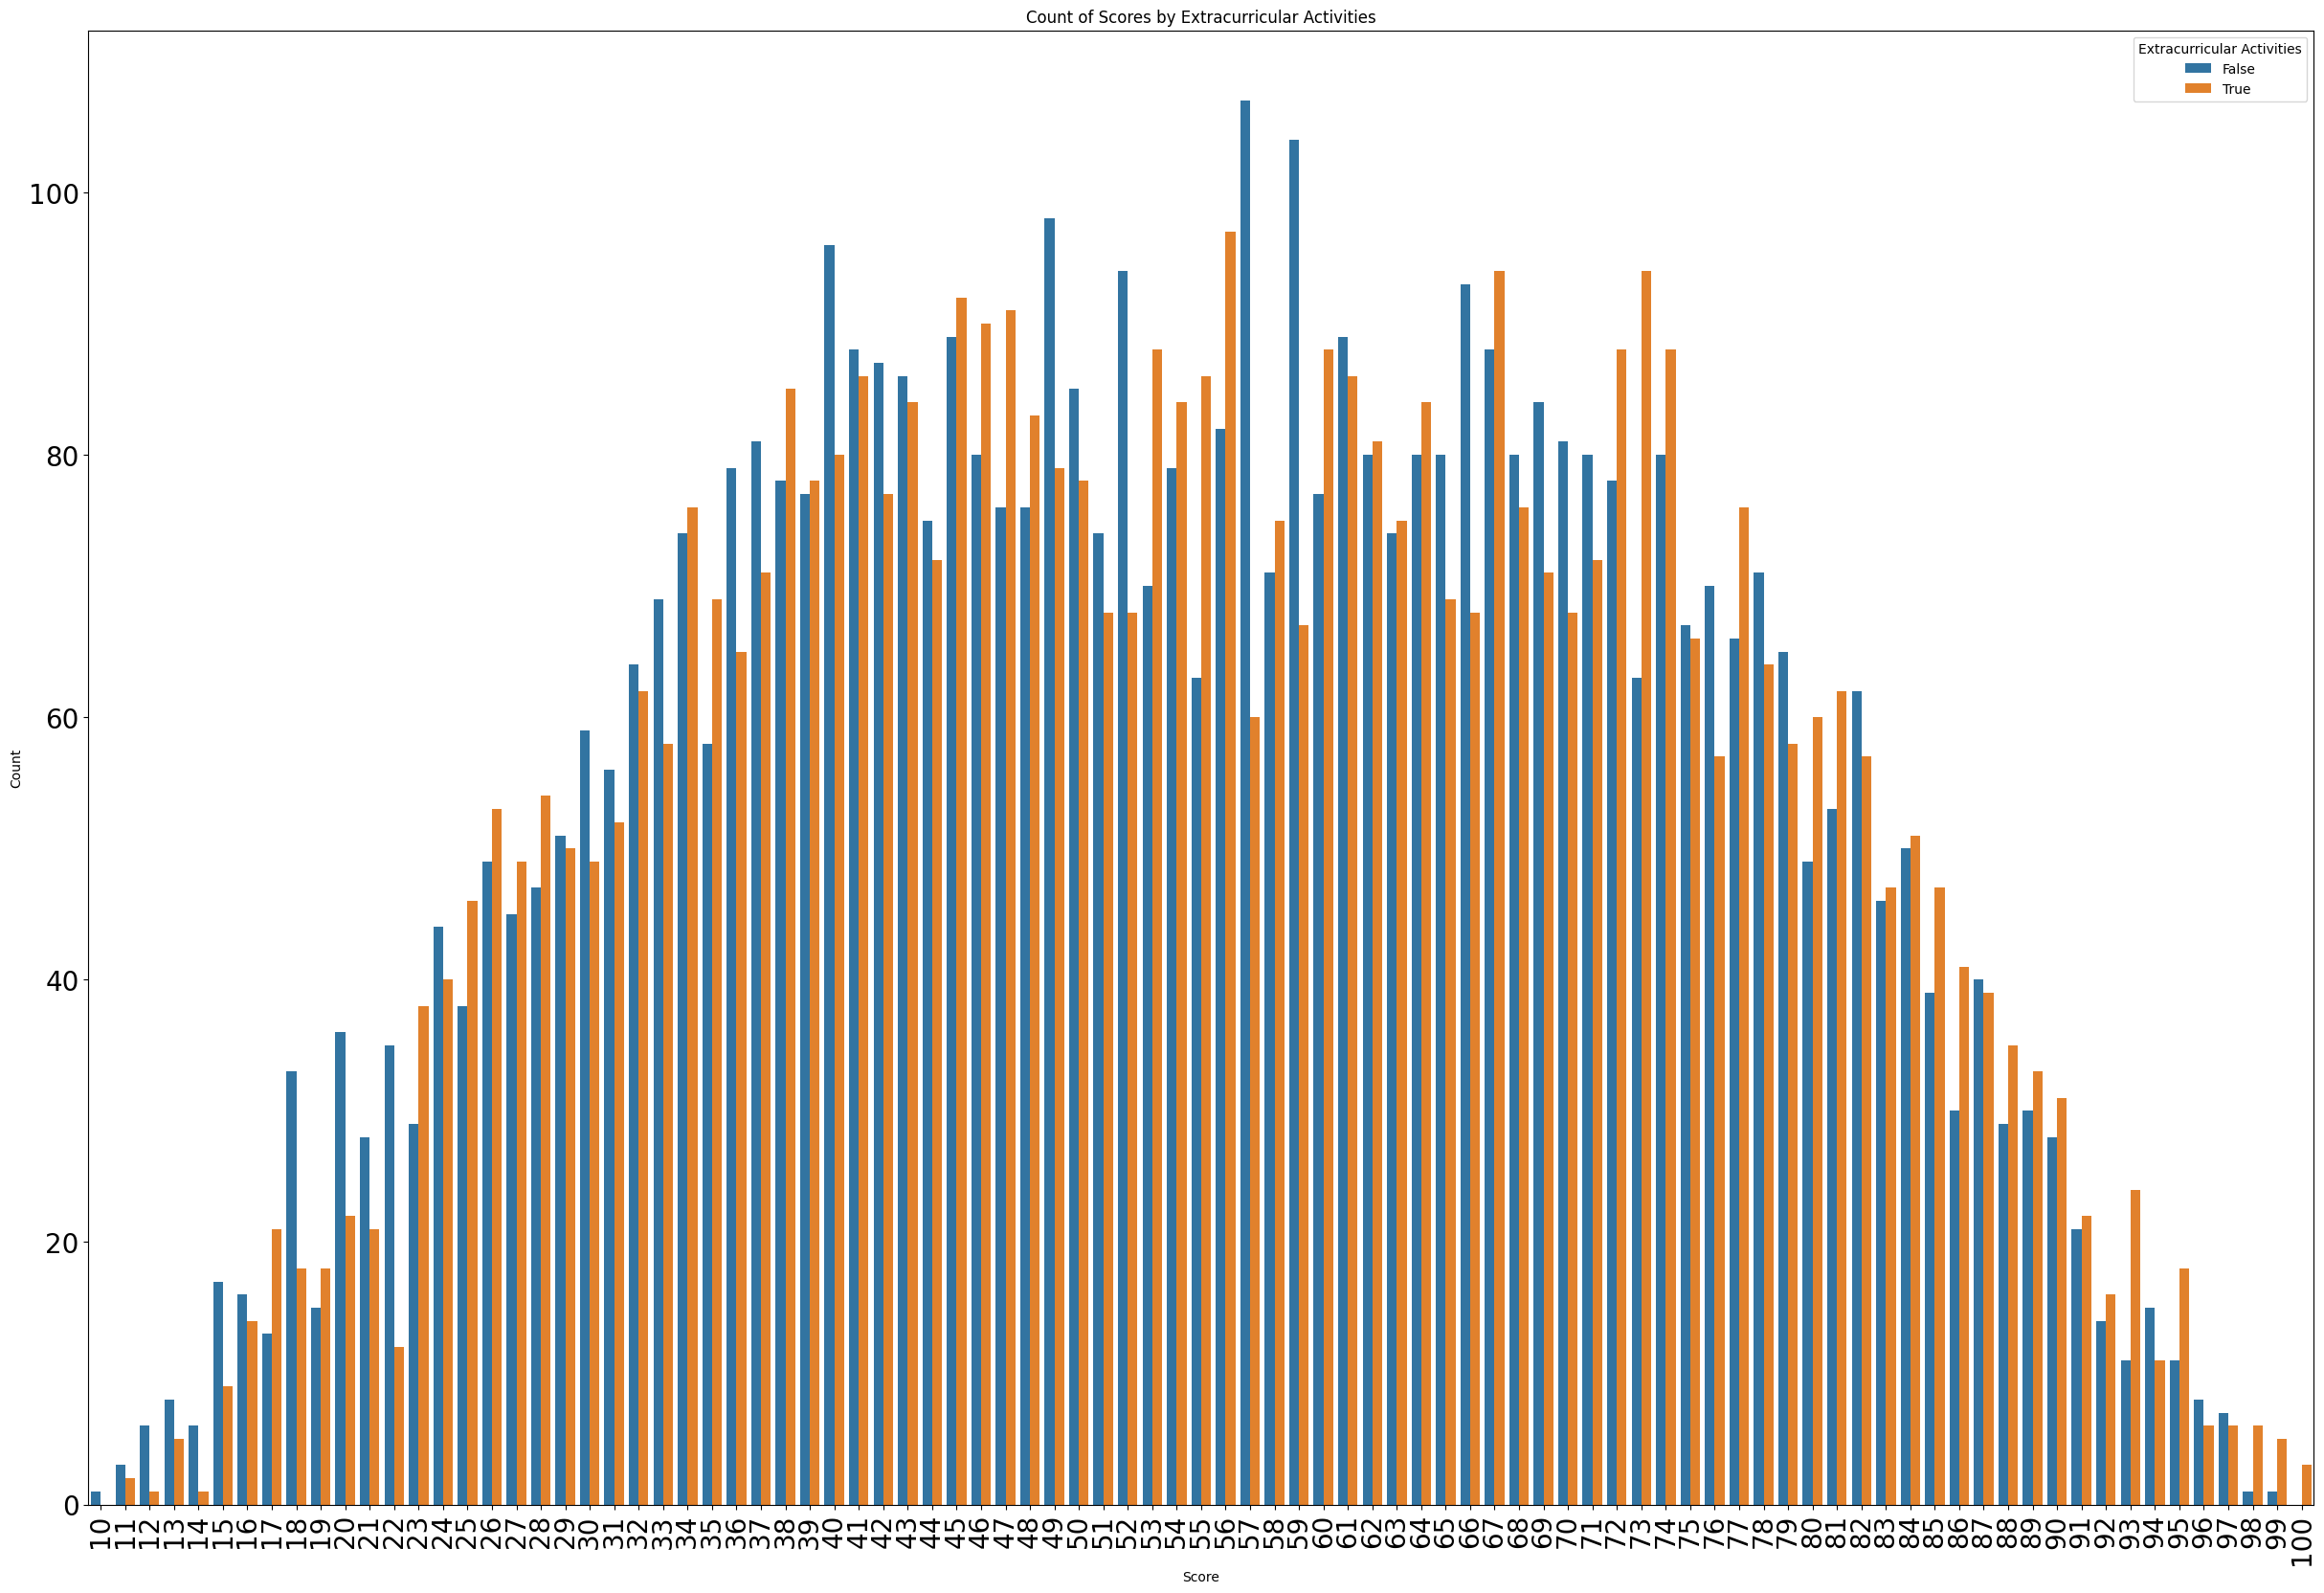

In [24]:
plt.figure(figsize=(30,20))
sns.countplot(x="Score", hue ="Extracurricular Activities", data=new_data)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Scores by Extracurricular Activities')
plt.xticks(rotation=90,  fontsize=20)
plt.yticks( fontsize=20)
plt.show()

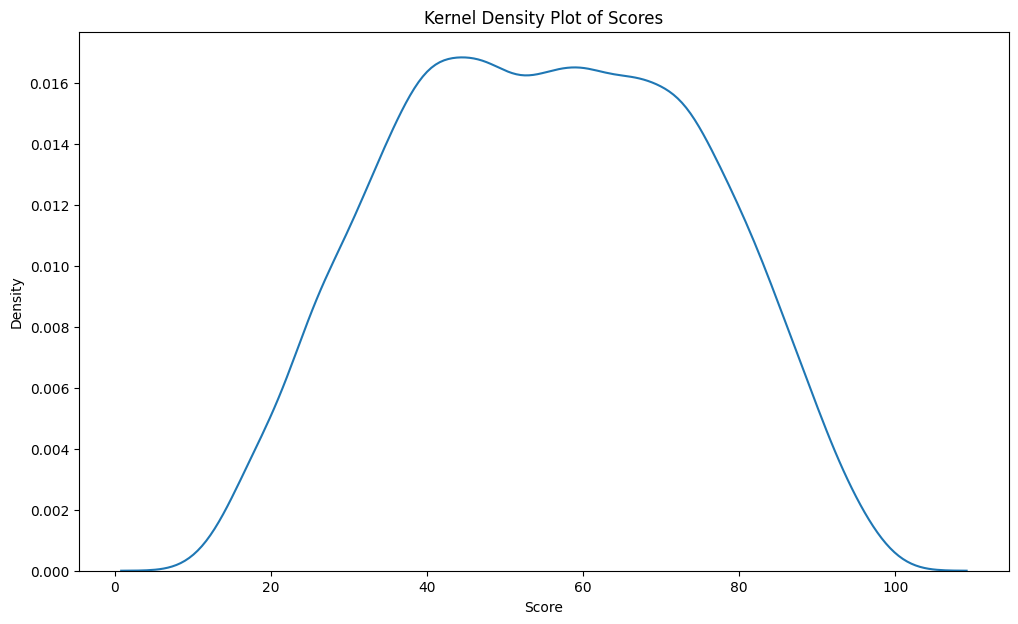

In [25]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=new_data, x='Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Scores')
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=0)

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [30]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [31]:
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}, Testing R-squared: {r2_test:.2f}")

Training MAE: 1.61, Testing MAE: 1.69
Training MSE: 4.10, Testing MSE: 4.49
Training R-squared: 0.99, Testing R-squared: 0.99


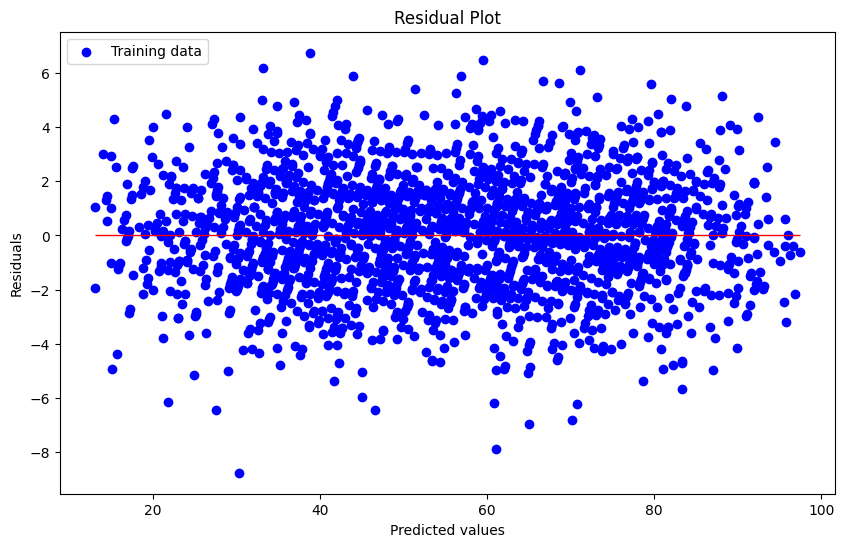

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_pred_test - y_test, c='blue', marker='o', label='Training data')
plt.hlines(y=0, xmin=np.min(y_pred_test), xmax=np.max(y_pred_test), colors='red', lw=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

In [33]:
RFE_CV = RFECV(estimator=model, min_features_to_select=1, cv=10)

In [34]:
results = RFE_CV.fit(independent, dependent)

In [35]:
results.support_

array([ True,  True,  True,  True,  True])

In [36]:
selected_columns = independent.columns[results.support_]

In [37]:
selected_columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [38]:
parameters = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [39]:
lasso_model = Lasso()

In [40]:
ridge_model = Ridge()

In [41]:
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv = 10)
best_grid_param_lasso = grid_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_lasso.best_params_)

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv = 10)
best_grid_param_ridge = grid_search_ridge.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_ridge.best_params_)

Best parameters for Lasso (Grid search):  {'alpha': 0.001}
Best parameters for Lasso (Grid search):  {'alpha': 1}


In [42]:
random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_lasso = random_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Random search): ", best_params_lasso.best_params_)

random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_ridge = random_search_ridge.fit(independent, dependent)
print("Best parameters for Ridge (Random search): ", best_params_ridge.best_params_)


Best parameters for Lasso (Random search):  {'alpha': 0.001}
Best parameters for Ridge (Random search):  {'alpha': 1}


In [43]:
lasso = Lasso(alpha = 0.001)

In [44]:
ridge = Ridge(alpha = 1)

In [45]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [46]:
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [47]:
y_pred_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")

Ridge Regression Mean Squared Error: 4.49


In [48]:
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")

Lasso Regression Mean Squared Error: 4.49


In [49]:
scores_1 = cross_val_score(model, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1

print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.19954754 4.17890463 3.97853574 4.22917841 4.31036621]
Average Cross-Validation MSE: 4.179306504798319


In [50]:
scores_1 = cross_val_score(ridge, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1

print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


In [51]:
scores_lasso = cross_val_score(lasso, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

mse_scores = -scores_1


print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


In [52]:
independent.columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [55]:
new_student_sample_data = np.array([6, 56, 7, 6, True]).reshape(1, 5)

In [56]:
prediction = model.predict(new_student_sample_data)
prediction_lasso = lasso.predict(new_student_sample_data)
prediction_ridge = ridge.predict(new_student_sample_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [57]:
print("Student score :",prediction)
print("Student score :",prediction_lasso)
print("Student score :",prediction_ridge)

Student score : [45.24303792]
Student score : [45.24055433]
Student score : [45.24281787]
